In [2]:
import numpy as np
import matplotlib.pyplot as plt

import cv2

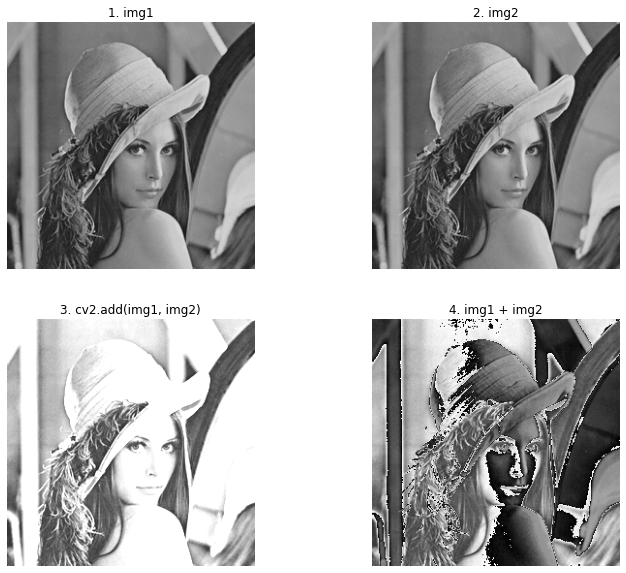

In [24]:
# 13. 图像的加法运算
img1 = cv2.imread("../images/lena.tif", 0)
img2 = cv2.imread("../images/lena.tif", 0)

imgAddCV = cv2.add(img1, img2)  # OpenCV 加法: 饱和运算
imgAddNP = img1 + img2  # # Numpy 加法: 模运算

plt.figure(figsize=(12, 10))
plt.subplot(221), plt.title("1. img1"), plt.axis('off')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))  # 显示 img1(RGB)
plt.subplot(222), plt.title("2. img2"), plt.axis('off')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))  # 显示 img2(RGB)
plt.subplot(223), plt.title("3. cv2.add(img1, img2)"), plt.axis('off')
plt.imshow(cv2.cvtColor(imgAddCV, cv2.COLOR_BGR2RGB))  # 显示 imgAddCV(RGB)
plt.subplot(224), plt.title("4. img1 + img2"), plt.axis('off')
plt.imshow(cv2.cvtColor(imgAddNP, cv2.COLOR_BGR2RGB))  # 显示 imgAddNP(RGB)
plt.show()

Shape of scalar [[ 50. 100. 150.]]
(x,y)=10,10, img1:[246 246 246], imgAddV:[255 246 246], imgAddS:[255 255 255]
(x,y)=20,20, img1:[250 250 250], imgAddV:[255 250 250], imgAddS:[255 255 255]
(x,y)=30,30, img1:[253 253 253], imgAddV:[255 253 253], imgAddS:[255 255 255]
(x,y)=40,40, img1:[254 254 254], imgAddV:[255 254 254], imgAddS:[255 255 255]
(x,y)=50,50, img1:[255 255 255], imgAddV:[255 255 255], imgAddS:[255 255 255]


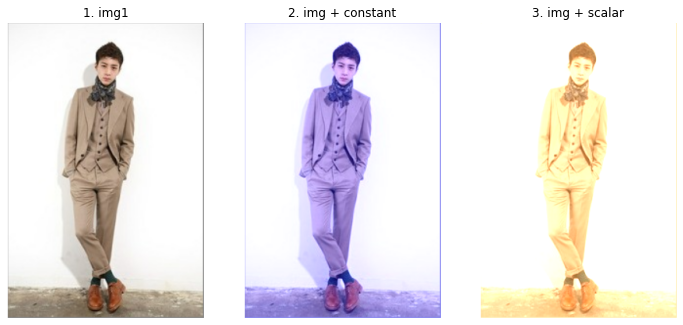

In [23]:
# 14. 图像与标量相加
img1 = cv2.imread("../images/handsomeboy.png", cv2.IMREAD_COLOR)  # 读取彩色图像(BGR)
img2 = cv2.imread("../images/handsomeboy.png", cv2.IMREAD_COLOR)  # 读取彩色图像(BGR)

Value = 100  # 常数
Scalar = np.array([[50., 100., 150.]])  # 标量
# Scalar = np.ones((1, 3), dtype="float") * Value  # 标量
imgAddV = cv2.add(img1, Value)  # OpenCV 加法: 图像 + 常数
imgAddS = cv2.add(img1, Scalar)  # OpenCV 加法: 图像 + 标量

print("Shape of scalar", Scalar)
for i in range(1, 6):
    x, y = i*10, i*10
    print("(x,y)={},{}, img1:{}, imgAddV:{}, imgAddS:{}"
          .format(x,y,img1[x,y],imgAddV[x,y],imgAddS[x,y]))

plt.figure(figsize=(12, 10))
plt.subplot(131), plt.title("1. img1"), plt.axis('off')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))  # 显示 img1(RGB)
plt.subplot(132), plt.title("2. img + constant"), plt.axis('off')
plt.imshow(cv2.cvtColor(imgAddV, cv2.COLOR_BGR2RGB))  # 显示 imgAddV(RGB)
plt.subplot(133), plt.title("3. img + scalar"), plt.axis('off')
plt.imshow(cv2.cvtColor(imgAddS, cv2.COLOR_BGR2RGB))  # 显示 imgAddS(RGB)
plt.show()

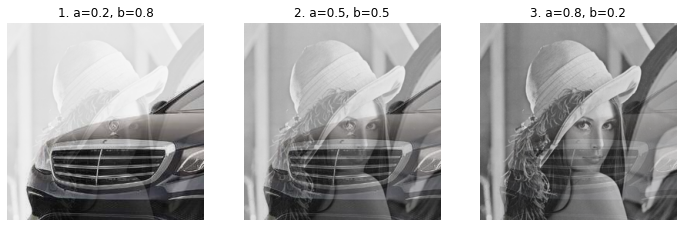

In [37]:
# 15. 图像的加权加法
img1 = cv2.imread("../images/lena.tif", cv2.IMREAD_COLOR)
img2 = cv2.imread("../images/car.jpg", cv2.IMREAD_COLOR)[:256, :256, :]

imgAddW1 = cv2.addWeighted(img1, 0.2, img2, 0.8, 0)  # 加权相加, a=0.2, b=0.8
imgAddW2 = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)  # 加权相加, a=0.5, b=0.5
imgAddW3 = cv2.addWeighted(img1, 0.8, img2, 0.2, 0)  # 加权相加, a=0.8, b=0.2

plt.figure(figsize=(12, 10))
plt.subplot(131), plt.title("1. a=0.2, b=0.8"), plt.axis('off')
plt.imshow(cv2.cvtColor(imgAddW1, cv2.COLOR_BGR2RGB))  # 显示 img1(RGB)
plt.subplot(132), plt.title("2. a=0.5, b=0.5"), plt.axis('off')
plt.imshow(cv2.cvtColor(imgAddW2, cv2.COLOR_BGR2RGB))  # 显示 imgAddV(RGB)
plt.subplot(133), plt.title("3. a=0.8, b=0.2"), plt.axis('off')
plt.imshow(cv2.cvtColor(imgAddW3, cv2.COLOR_BGR2RGB))  # 显示 imgAddS(RGB)
plt.show()

In [7]:
# 16 不同尺寸的图像加法
imgL = cv2.imread("../images/car.jpg", cv2.IMREAD_COLOR)  # 读取大图
imgS = cv2.imread("../images/lena.tif", cv2.IMREAD_COLOR)  # 读取小图 (LOGO)

x,y = 300,50  # 叠放位置
W1, H1 = imgL.shape[1::-1]  # 大图尺寸
W2, H2 = imgS.shape[1::-1]  # 小图尺寸
if (x + W2) > W1: x = W1 - W2  # 调整图像叠放位置，避免溢出
if (y + H2) > H1: y = H1 - H2

imgCrop = imgL[y:y + H2, x:x + W2]  # 裁剪大图，与小图 imgS 的大小相同
imgAdd = cv2.add(imgCrop, imgS)  # cv2 加法，裁剪图与小图叠加
alpha, beta, gamma = 0.2, 0.8, 0.0  # 加法权值
imgAddW = cv2.addWeighted(imgCrop, alpha, imgS, beta, gamma)  # 加权加法，裁剪图与小图叠加

imgAddM = np.array(imgL)
imgAddM[y:y + H2, x:x + W2] = imgAddW  # 用叠加小图替换原图 imgL 的叠放位置

cv2.imshow("imgAdd", imgAdd)
cv2.imshow("imgAddW", imgAddW)
cv2.imshow("imgAddM", imgAddM)
cv2.waitKey(0)


KeyboardInterrupt: 

In [3]:
# 17. 两张图像的渐变切换
img1 = cv2.imread("../images/lena.tif", cv2.IMREAD_COLOR)
img2 = cv2.imread("../images/car.jpg", cv2.IMREAD_COLOR)[:256, :256, :]
wList = np.arange(0.0, 1.0, 0.05)  # start, end, step
for w in wList:
    imgAddW = cv2.addWeighted(img1, w, img2, (1 - w), 0)
    cv2.imshow("imgAddWeight", imgAddW)
    cv2.waitKey(100)

cv2.destroyAllWindows()

In [11]:
# 18. 图像的掩模加法
img1 = cv2.imread("../images/car.jpg", cv2.IMREAD_COLOR)

Mask = np.zeros((img1.shape[0], img1.shape[1]), dtype=np.uint8)  # 返回与图像 img1 尺寸相同的全零数组
xmin, ymin, w, h = 180, 190, 200, 200  # 矩形裁剪区域 (ymin:ymin+h, xmin:xmin+w) 的位置参数
Mask[ymin:ymin+h, xmin:xmin+w] = 255  # 掩模图像，ROI 为白色，其它区域为黑色
print(img1.shape, img2.shape, Mask.shape)

imgAddMask1 = cv2.add(img1, img2, mask=Mask)  # 带有掩模 mask 的加法
imgAddMask2 = cv2.add(img1, np.zeros(np.shape(img1), dtype=np.uint8), mask=Mask)  # 提取 ROI

cv2.imshow("MaskImage", Mask)  # 显示掩模图像 Mask
cv2.imshow("MaskAdd", imgAddMask1)  # 显示掩模加法结果 imgAddMask1
cv2.imshow("MaskROI", imgAddMask2)  # 显示从 img1 提取的 ROI
key = cv2.waitKey(0)  # 等待按键命令

(360, 640, 3) (360, 640, 3) (360, 640)


In [9]:
# 19. 图像的圆形遮罩
img1 = cv2.imread("../images/car.jpg", cv2.IMREAD_COLOR)

Mask1 = np.zeros((img1.shape[0], img1.shape[1]), dtype=np.uint8)  # 返回与图像 img1 尺寸相同的全零数组
Mask2 = Mask1.copy()
cv2.circle(Mask1, (285, 285), 110, (255, 255, 255), -1)  # -1 表示实心
cv2.ellipse(Mask2, (285, 285), (100, 150), 0, 0, 360, 255, -1)  # -1 表示实心

imgAddMask1 = cv2.add(img1, np.zeros(np.shape(img1), dtype=np.uint8), mask=Mask1)  # 提取圆形 ROI
imgAddMask2 = cv2.add(img1, np.zeros(np.shape(img1), dtype=np.uint8), mask=Mask2)  # 提取椭圆 ROI

cv2.imshow("circularMask", Mask1)  # 显示掩模图像 Mask
cv2.imshow("circularROI", imgAddMask1)  # 显示掩模加法结果 imgAddMask1
cv2.imshow("ellipseROI", imgAddMask2)  # 显示掩模加法结果 imgAddMask2
key = cv2.waitKey(0)  # 等待按键命令

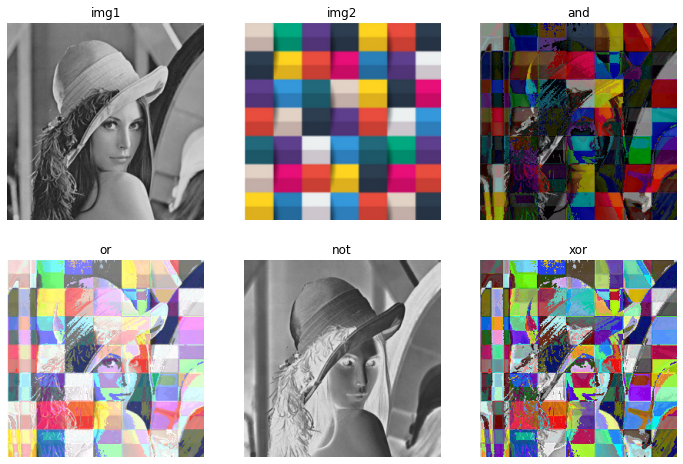

In [15]:
# 20. 图像的按位运算
img1 = cv2.imread("../images/lena.tif")  # 读取彩色图像(BGR)
img2 = cv2.imread("../images/img2.png")  # 读取彩色图像(BGR)

imgAnd = cv2.bitwise_and(img1, img2)  # 按位 与(AND)
imgOr = cv2.bitwise_or(img1, img2)  # 按位 或(OR)
imgNot = cv2.bitwise_not(img1)  # 按位 非(NOT)
imgXor = cv2.bitwise_xor(img1, img2)  # 按位 异或(XOR)

plt.figure(figsize=(12,8))
titleList = ["img1", "img2", "and", "or", "not", "xor"]
imageList = [img1, img2, imgAnd, imgOr, imgNot, imgXor]
for i in range(6):
    plt.subplot(2,3,i+1), plt.title(titleList[i]), plt.axis('off')
    plt.imshow(cv2.cvtColor(imageList[i], cv2.COLOR_BGR2RGB), 'gray')
plt.show()

In [ ]:
img1, img2

640 360 180 238 0 10


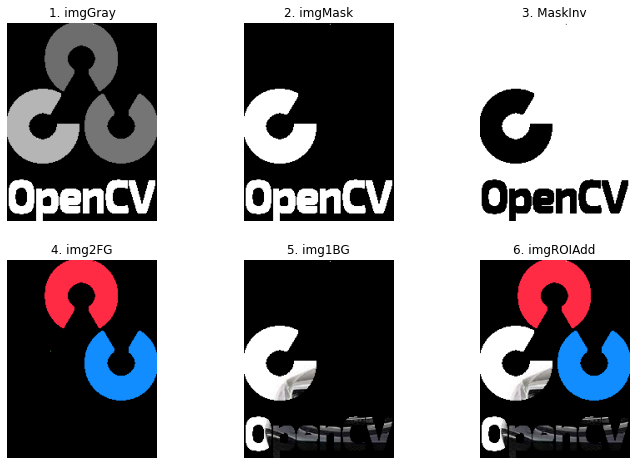

In [23]:
# 21. 图像的叠加

img1 = cv2.imread("../images/car.jpg")  # 读取彩色图像(BGR)
img2 = cv2.imread("../images/opencv-logo-white.png")  # 读取 CV Logo

x, y = (0, 10)  # 图像叠加位置
W1, H1 = img1.shape[1::-1]
W2, H2 = img2.shape[1::-1]
if (x + W2) > W1: x = W1 - W2
if (y + H2) > H1: y = H1 - H2
print(W1,H1,W2,H2,x,y)
imgROI = img1[y:y+H2, x:x+W2]  # 从背景图像裁剪出叠加区域图像

img2Gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)  # img2: 转换为灰度图像
ret, mask = cv2.threshold(img2Gray, 175, 255, cv2.THRESH_BINARY)  # 转换为二值图像，生成遮罩，LOGO 区域黑色遮盖
maskInv = cv2.bitwise_not(mask)  # 按位非(黑白转置)，生成逆遮罩，LOGO 区域白色开窗，LOGO 以外区域黑色

# mask 黑色遮盖区域输出为黑色，mask 白色开窗区域与运算（原图像素不变）
img1Bg = cv2.bitwise_and(imgROI, imgROI, mask=mask)  # 生成背景，imgROI 的遮罩区域输出黑色
img2Fg = cv2.bitwise_and(img2, img2, mask=maskInv)  # 生成前景，LOGO 的逆遮罩区域输出黑色
# img1Bg = cv2.bitwise_or(imgROI, imgROI, mask=mask)  # 生成背景，与 cv2.bitwise_and 效果相同
# img2Fg = cv2.bitwise_or(img2, img2, mask=maskInv)  # 生成前景，与 cv2.bitwise_and 效果相同
# img1Bg = cv2.add(imgROI, np.zeros(np.shape(img2), dtype=np.uint8), mask=mask)  # 生成背景，与 cv2.bitwise 效果相同
# img2Fg = cv2.add(img2, np.zeros(np.shape(img2), dtype=np.uint8), mask=maskInv)  # 生成背景，与 cv2.bitwise 效果相同
imgROIAdd = cv2.add(img1Bg, img2Fg)  # 前景与背景合成，得到裁剪部分的叠加图像
imgAdd = img1.copy()
imgAdd[y:y+H2, x:x+W2] = imgROIAdd  # 用叠加图像替换背景图像中的叠加位置，得到叠加 Logo 合成图像

plt.figure(figsize=(12,8))
titleList = ["1. imgGray", "2. imgMask", "3. MaskInv", "4. img2FG", "5. img1BG", "6. imgROIAdd"]
imageList = [img2Gray, mask, maskInv, img2Fg, img1Bg, imgROIAdd]
for i in range(6):
    plt.subplot(2,3,i+1), plt.title(titleList[i]), plt.axis('off')
    if (imageList[i].ndim==3):  # 彩色图像 ndim=3
        plt.imshow(cv2.cvtColor(imageList[i], cv2.COLOR_BGR2RGB))  # 彩色图像需要转换为 RGB 格式
    else:  # 灰度图像 ndim=2
        plt.imshow(imageList[i], 'gray')
plt.show()
cv2.imshow("imgAdd", imgAdd)  # 显示叠加图像 imgAdd
key = cv2.waitKey(0)  # 等待按键命令

In [25]:
# 22. 图像添加非中文文字
img1 = cv2.imread("../images/lena.tif")  # 读取彩色图像(BGR)
text = "OpenCV2022"
fontList = [cv2.FONT_HERSHEY_SIMPLEX,
            cv2.FONT_HERSHEY_SIMPLEX,
            cv2.FONT_HERSHEY_PLAIN,
            cv2.FONT_HERSHEY_DUPLEX,
            cv2.FONT_HERSHEY_COMPLEX,
            cv2.FONT_HERSHEY_TRIPLEX,
            cv2.FONT_HERSHEY_COMPLEX_SMALL,
            cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
            cv2.FONT_HERSHEY_SCRIPT_COMPLEX,
            cv2.FONT_ITALIC]
fontScale = 1  # 字体缩放比例
color = (255, 255, 255)  # 字体颜色
for i in range(10):
    pos = (10, 50*(i+1))
    imgPutText = cv2.putText(img1, text, pos, fontList[i], fontScale, color)

cv2.imshow("imgPutText", imgPutText)  # 显示叠加图像 imgAdd
key = cv2.waitKey(0)  # 等待按键命令


In [27]:
# 1.32 图像中添加中文文字
imgBGR = cv2.imread("../images/lena.tif")  # 读取彩色图像(BGR)


from PIL import Image, ImageDraw, ImageFont
if (isinstance(imgBGR, np.ndarray)):  # 判断是否 OpenCV 图片类型
    imgPIL = Image.fromarray(cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB))
text = "中文字体"
pos = (50, 20)  # (left, top)，字符串左上角坐标
color = (255, 255, 255)  # 字体颜色
textSize = 40
drawPIL = ImageDraw.Draw(imgPIL)
fontText = ImageFont.truetype("font/simsun.ttc", textSize, encoding="utf-8")
drawPIL.text(pos, text, color, font=fontText)
imgPutText = cv2.cvtColor(np.asarray(imgPIL), cv2.COLOR_RGB2BGR)

cv2.imshow("imgPutText", imgPutText)  # 显示叠加图像 imgAdd
key = cv2.waitKey(0)  # 等待按键命令
